# $\rho/{\tilde\eta}$ v.s. $\Delta H$, $\Delta E$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from matplotlib.gridspec import GridSpec
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mark=np.array(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
color_list = color_list*2


In [126]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']

	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E += (a * t[i] + b) * N_t * phi_t  # row-wise 연산

	return E  # 각 row별 E 값이 담긴 Series 반환

def E_a(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	E_list = []
	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E_list.append((a * t[i] + b) * N_t * phi_t)  # row-wise 연산

	return E_list  # 각 row별 E 값이 담긴 Series 반환

def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

def find_min_a(data):
	save_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'
	ai=0
	E_list=[]
	E_a_min = []
	for i in range(31):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		ai+=1
	a_i=0
	for a in np.linspace(-2, 1, 31):
		if a*5+b(data,a) > 0: 
			E_a_min.append(E_list[a_i])
			break
		a_i+=1
	return a_i

In [253]:
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')
a_min_i = find_min_a(data)
a_max_i = 23
h_0_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_20.csv')
h_min_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_min_i)+'.csv')
h_max_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_max_i)+'.csv')
y_0 = h_0_opt['h']/data['h']
y_min = h_min_opt['h']/data['h']
a_min=np.linspace(-2,1,31)[a_min_i]
a_max=np.linspace(-2,1,31)[a_max_i]

In [254]:
# 1. 필요한 컬럼 정의
cols = data.columns[10:15]

# 2. 계산
N_age = data[cols].multiply(data['N'], axis=0)
rho_age = N_age.divide(data['A'], axis=0)
tilde_eta_age = data[data.columns[24:24+len(cols)]]

# 3. 위치기반으로 element-wise 연산 → 다시 DataFrame으로 되살림
rho_tilde_eta_age = pd.DataFrame(
    rho_age.values / tilde_eta_age.values,
    columns=cols,
    index=data.index
)

In [255]:
delta_H = h_min_opt - h_0_opt
b_amin = b(data, a=a_min)
b_a0 = b(data, a=0) 
delta_E = E(data, h_pd = h_min_opt, a = a_min, b=b_amin) - E(data, h_pd = h_0_opt, a=0, b=b_a0)

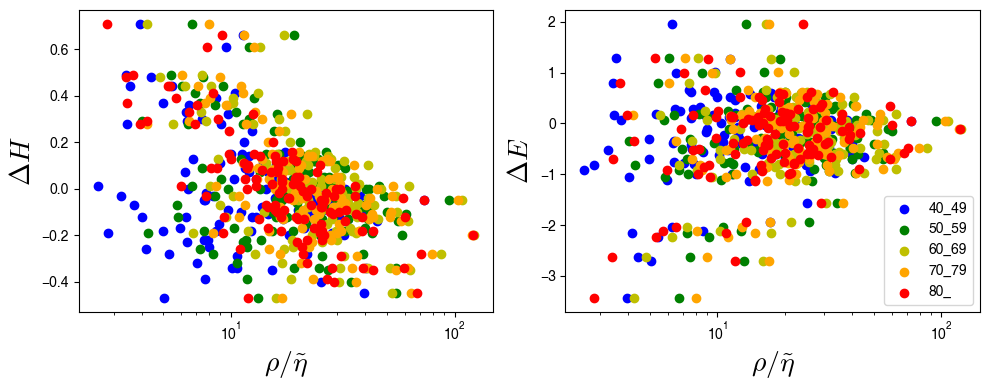

In [256]:
fig = plt.figure(figsize=[10,4])
gs = GridSpec(1, 2)
colors = ['b', 'g', 'y', 'orange','r']
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    ax1.scatter(x, delta_H, c=colors[i])
    ax2.scatter(x, delta_E, c=colors[i],label=cols[i][2:])
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax2.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax1.set_ylabel(r'$\Delta H$',size=20)
ax2.set_ylabel(r'$\Delta E$',size=20)
ax2.legend()
plt.tight_layout()
plt.show()

In [257]:
delta_E_age = np.array(E_a(data, h_pd = h_min_opt, a = a_min, b=b_amin))- np.array(E_a(data, h_pd = h_0_opt, a=0, b=b_a0))

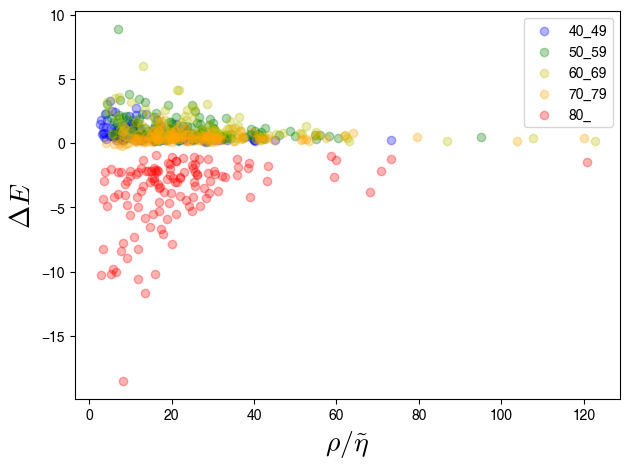

In [258]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)
# plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

# 1 & 3 사분면 표시

In [259]:
df = pd.DataFrame({
    'dE': delta_E,
    'dH': delta_H['h']
})


In [260]:
df_clean = df.dropna()
q1 = df_clean[(df_clean['dE'] > 0) & (df_clean['dH'] > 0)]
q3 = df_clean[(df_clean['dE'] < 0) & (df_clean['dH'] < 0)]

In [261]:
q3.index

Index([  2,   7,   9,  13,  14,  15,  19,  20,  38,  39,  41,  52,  53,  55,
        56,  57,  58,  61,  65,  67,  68,  71,  72,  73,  74,  76,  77,  78,
        79,  81,  82,  83,  84,  85,  86,  87,  88,  89,  97,  98, 100, 101,
       102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 121],
      dtype='int64')

In [262]:
q1.index

Index([  1,  11,  17,  18,  21,  22,  24,  25,  26,  27,  28,  29,  30,  31,
        33,  34,  35,  36,  37,  40,  42,  43,  44,  47,  50,  54,  59,  63,
        64,  70,  95, 118, 122, 123],
      dtype='int64')

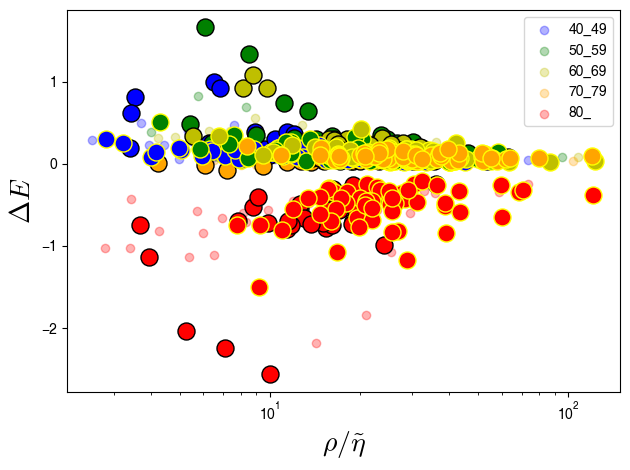

In [263]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

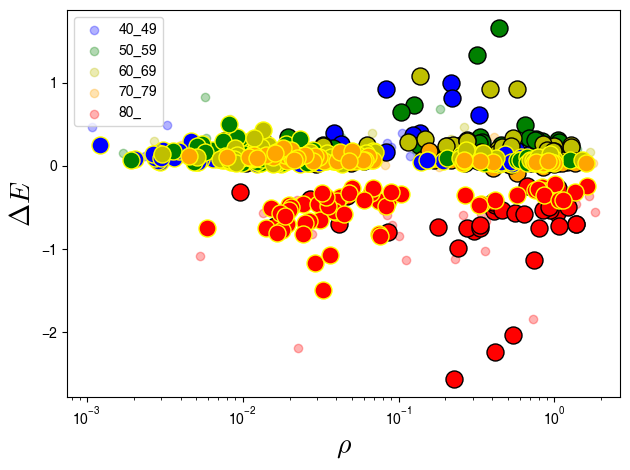

In [264]:
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

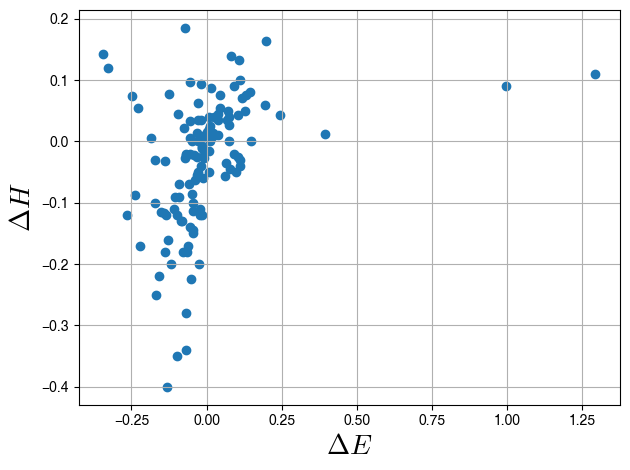

In [270]:
plt.scatter(delta_E/data['D'], delta_H['h']/data['h'])
plt.grid()
plt.ylabel(r'$\Delta H$',size=20)
plt.xlabel(r'$\Delta E$',size=20)
plt.tight_layout()
plt.show()

# 1 & 3 사분면 표시(amax)

In [271]:
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')
a_min_i = 23#find_min_a(data)
a_max_i = 23
h_0_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_20.csv')
h_min_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_min_i)+'.csv')
h_max_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_max_i)+'.csv')
y_0 = h_0_opt['h']/data['h']
y_min = h_min_opt['h']/data['h']
a_min=np.linspace(-2,1,31)[a_min_i]
a_max=np.linspace(-2,1,31)[a_max_i]

In [272]:
# 1. 필요한 컬럼 정의
cols = data.columns[10:15]

# 2. 계산
N_age = data[cols].multiply(data['N'], axis=0)
rho_age = N_age.divide(data['A'], axis=0)
tilde_eta_age = data[data.columns[24:24+len(cols)]]

# 3. 위치기반으로 element-wise 연산 → 다시 DataFrame으로 되살림
rho_tilde_eta_age = pd.DataFrame(
    rho_age.values / tilde_eta_age.values,
    columns=cols,
    index=data.index
)

In [273]:
delta_H = h_min_opt - h_0_opt
b_amin = b(data, a=a_min)
b_a0 = b(data, a=0) 
delta_E = E(data, h_pd = h_min_opt, a = a_min, b=b_amin) - E(data, h_pd = h_0_opt, a=0, b=b_a0)

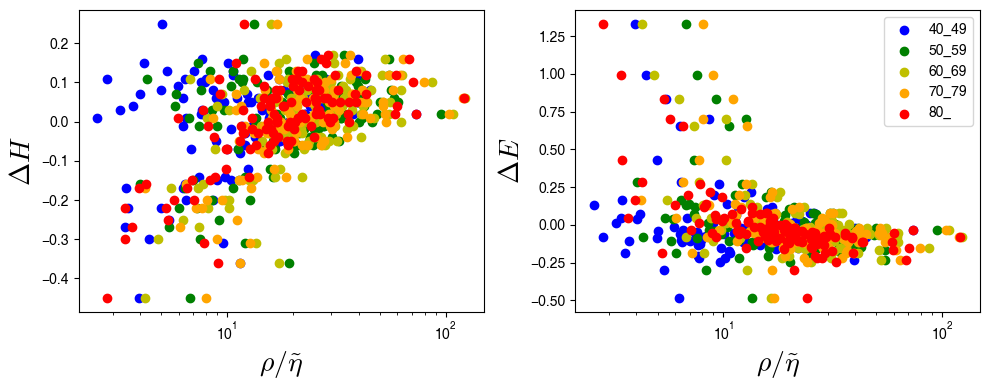

In [274]:
fig = plt.figure(figsize=[10,4])
gs = GridSpec(1, 2)
colors = ['b', 'g', 'y', 'orange','r']
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    ax1.scatter(x, delta_H, c=colors[i])
    ax2.scatter(x, delta_E, c=colors[i],label=cols[i][2:])
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax2.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax1.set_ylabel(r'$\Delta H$',size=20)
ax2.set_ylabel(r'$\Delta E$',size=20)
ax2.legend()
plt.tight_layout()
plt.show()

In [275]:
delta_E_age = np.array(E_a(data, h_pd = h_min_opt, a = a_min, b=b_amin))- np.array(E_a(data, h_pd = h_0_opt, a=0, b=b_a0))

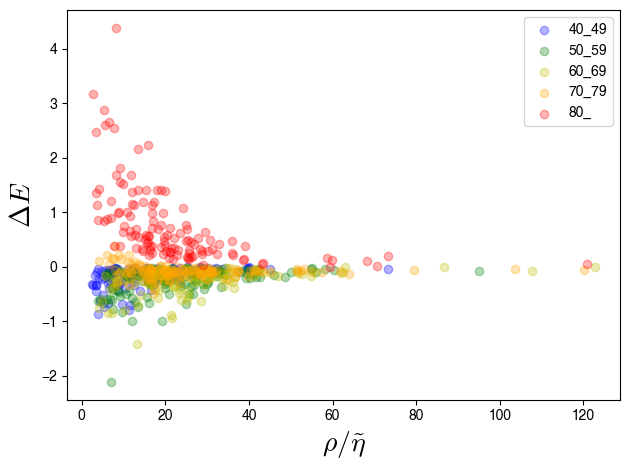

In [276]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)
# plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

# 1 & 3 사분면 표시

In [277]:
df = pd.DataFrame({
    'dE': delta_E,
    'dH': delta_H['h']
})


In [278]:
df_clean = df.dropna()
q1 = df_clean[(df_clean['dE'] > 0) & (df_clean['dH'] > 0)]
q3 = df_clean[(df_clean['dE'] < 0) & (df_clean['dH'] < 0)]

In [279]:
q3.index

Index([  1,  11,  17,  21,  24,  27,  28,  29,  30,  31,  34,  35,  42,  43,
        50,  54,  59,  64,  70,  95, 118],
      dtype='int64')

In [280]:
q1.index

Index([5, 9, 13, 14, 41, 57, 62, 75, 76, 104, 113], dtype='int64')

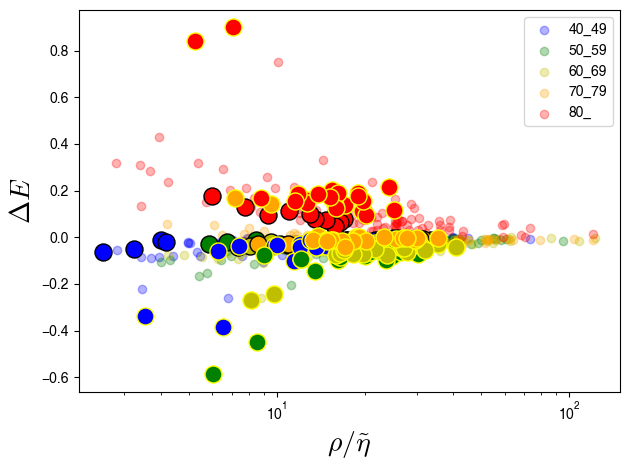

In [281]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

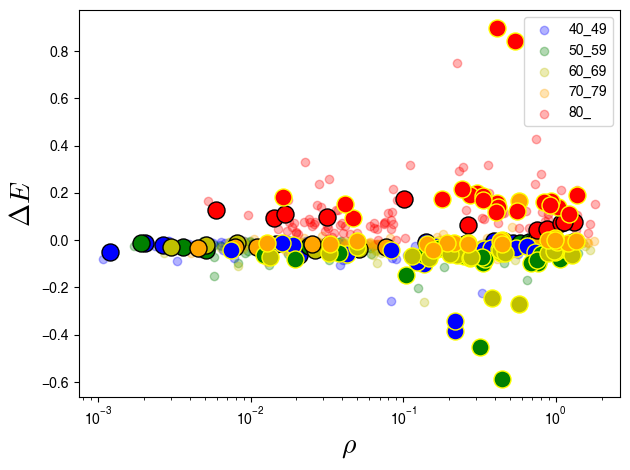

In [282]:
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

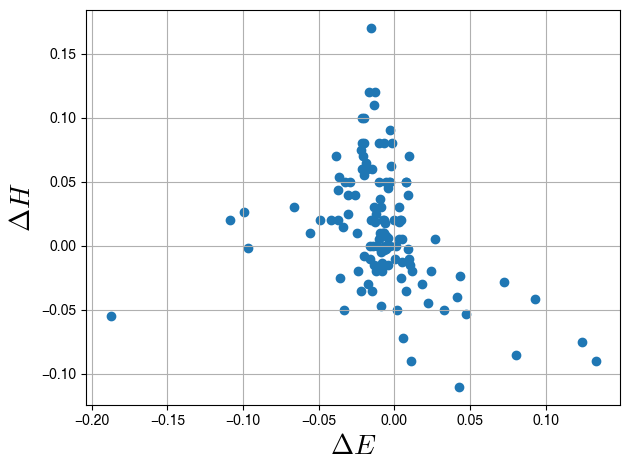

In [283]:
plt.scatter(delta_E/data['D'], delta_H['h']/data['h'])
plt.grid()
plt.ylabel(r'$\Delta H$',size=20)
plt.xlabel(r'$\Delta E$',size=20)
plt.tight_layout()
plt.show()

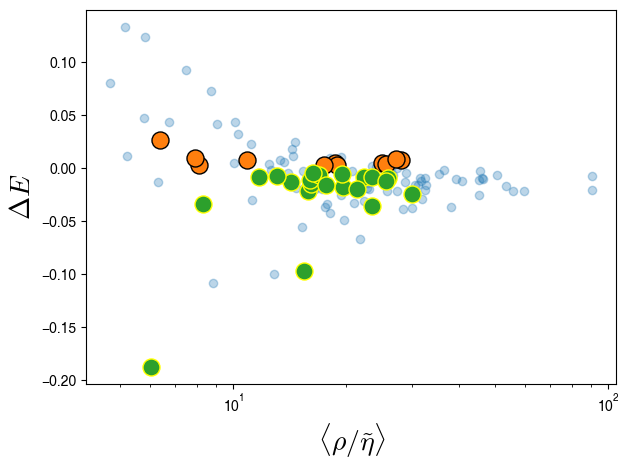

In [304]:
x = np.mean(rho_tilde_eta_age,axis=1)
y = delta_E/data['D']
plt.scatter(x, y, alpha=0.3)
#q1
x_q1 = x.loc[q1.index]
q1_idx = q1.index.to_list()
y_q1 = y[q1_idx]
plt.scatter(x_q1, y_q1, alpha=1, s=150,ec = 'k')
#q3

x_q3 = x.loc[q3.index]
q3_idx = q3.index.to_list()
y_q3 = y[q3_idx]
plt.scatter(x_q3, y_q3, alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\langle\rho/{\tilde\eta}\rangle$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.tight_layout()
plt.show()

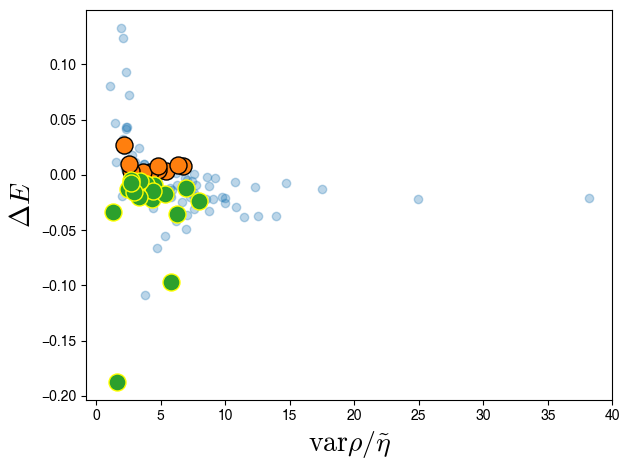

In [305]:
x = np.std(rho_tilde_eta_age,axis=1)
y = delta_E/data['D']
plt.scatter(x, y, alpha=0.3)
#q1
x_q1 = x.loc[q1.index]
q1_idx = q1.index.to_list()
y_q1 = y[q1_idx]
plt.scatter(x_q1, y_q1, alpha=1, s=150,ec = 'k')
#q3

x_q3 = x.loc[q3.index]
q3_idx = q3.index.to_list()
y_q3 = y[q3_idx]
plt.scatter(x_q3, y_q3, alpha=1, s=150,ec = 'yellow')
# plt.xscale('log')
plt.xlabel(r'$\mathrm{var}\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.tight_layout()
plt.show()

In [287]:
np.mean(rho_tilde_eta_age, axis=1)

0      10.315229
1      22.391628
2      36.550015
3      19.345163
4      90.572254
         ...    
119    10.711194
120    10.051962
121    28.685730
122    13.669897
123    23.477757
Length: 124, dtype: float64

In [288]:
np.std(rho_tilde_eta_age, axis=1)

0       2.073795
1       3.862587
2       8.553116
3       3.690608
4      14.738655
         ...    
119     2.548313
120     2.203492
121     5.883979
122     3.838157
123     6.203266
Length: 124, dtype: float64

In [ ]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()